Stochastic Reed-Frost Model
Known as a chain binomial model

20


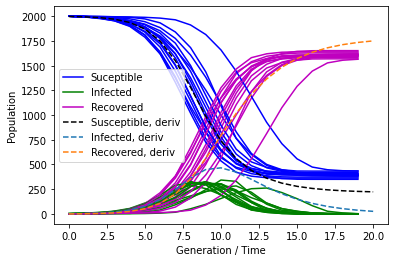

R_0 is: 2.5
End-population: 2000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

"Stochastic SIR model"
gen = 20 # The number of generations to simulate
gen_arr = np.linspace(0, gen - 1 ,gen)
print(len(gen_arr))
x_0 = np.array([2000,2,0])  # parameters are initial S, I, r


q = 0.999 # probability that suceptible does not get disease from an infected individual

sims= 15 # number of simulations to run

for i in range(sims):
    S= np.zeros(len(gen_arr))
    I = np.zeros(len(gen_arr))
    R = np.zeros(len(gen_arr))

    S[0] = x_0[0]
    I[0] = x_0[1]
    R[0] = x_0[2]

    for j in range(len(gen_arr) - 1):

        I[j+1] = np.random.binomial(S[j], 1 - q**(I[j])) # random binomial dist
        S[j+1] = S[j] - I[j+1]
        R[j+1] = R[j] + I[j]
    if i == 0:
        plt.plot(gen_arr, S, label="Suceptible", c='b')
        plt.plot(gen_arr, I, label = "Infected", c = 'g')
        plt.plot(gen_arr, R, label = "Recovered", c = 'm')
    else:
        plt.plot(gen_arr, I,  c='g')
        plt.plot(gen_arr, S, c='b')
        plt.plot(gen_arr, R,  c='m')


def sir_odes(t, x, b, g, N):
    S = x[0]
    I = x[1]
    R = x[2]

    dSdt = -(b/N)*S*I
    dIdt = (b/N)*S*I - g*I
    dRdt = g*I

    return [dSdt, dIdt, dRdt]

t_span = np.array([0,20]) # Time limits
t = np.linspace(t_span[0], t_span[1], t_span[1] + 1)  # Time series
x_0 = np.array([1998, 2, 0])  # Initial conditions for model variables: S, I, R respectively
args = (1.25, 0.5, np.sum(x_0))  # Arguments for our model parameters: \beta, \gamma, N

sol = solve_ivp(sir_odes, t_span, x_0, args=args, t_eval = t)

R_0 = args[0]/args[1]
S = sol.y[0]
I = sol.y[1]
R = sol.y[2]
N = S + I + R

plt.plot(t, S, label='Susceptible, deriv', c = "black", ls = '--')
plt.plot(t, I, label='Infected, deriv',  ls = '--')
plt.plot(t, R, label='Recovered, deriv',  ls = '--')




plt.xlabel("Generation / Time")
plt.ylabel("Population")
plt.legend()
plt.show()


print("R_0 is:", round(R_0,3))
print("End-population:", int(round(N[-1],0)))